<a href="https://colab.research.google.com/github/MaulidinZakaria/16_MaulidinZakaria-Machine_Learning/blob/main/Pertemuan_3/Tugas_Praktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas : Multiple Linear Regression**

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

3. Lakukan feature scaling jika diperlukan.

4. Buat model multiple linear regression menggunakan Scikit-Learn.

5. Latih model pada data latih dan lakukan prediksi pada data uji.

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

## **Jawaban :**

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. import numpy as np:

  - NumPy adalah library yang digunakan untuk komputasi numerik dan manipulasi array multidimensi dalam Python.

2. import pandas as pd:

  - Pandas adalah library yang digunakan untuk manipulasi data, terutama dalam bentuk DataFrame dan Series, yang memungkinkan untuk mengelola dan menganalisis data dengan lebih mudah dan efisien.

3. import matplotlib.pyplot as plt:

  - Matplotlib digunakan untuk Visualisasi data dalam berbagai bentuk grafik.

In [40]:
data = pd.read_csv('insurance.csv')

Kode tersebut digunakan untuk membaca data dari file insurance.csv dan menyimpannya dalam variabel data untuk analisis lebih lanjut.

### **1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).**

In [41]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


- data.info(): Untuk melihat informasi umum tentang struktur DataFrame.
- data.head(): Untuk melihat beberapa baris pertama data dan mendapatkan gambaran mengenai isinya.

In [42]:
# encoding data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data_non_number = data.select_dtypes(include=['object']).columns

for column in data_non_number:
    data[column] = le.fit_transform(data[column])


1. from sklearn.preprocessing import LabelEncoder:
  - Mengimpor LabelEncoder dari Scikit-learn, yang digunakan untuk mengubah (encode) variabel kategorikal menjadi angka.
2. le = LabelEncoder():
  - Membuat objek LabelEncoder dengan nama le.
3. data_non_number = data.select_dtypes(include=['object']).columns:
  - data.select_dtypes(include=['object']) memilih kolom-kolom dalam DataFrame data yang bertipe object.
  - .columns mengembalikan nama-nama kolom yang bertipe object, disimpan dalam variabel data_non_number.
4. for column in data_non_number::
  - Looping atau perulangan untuk setiap nama kolom di data_non_number.
5. data[column] = le.fit_transform(data[column]):
  - Kode ini digunakan untuk mengubah semua kolom non-numerik dalam data menjadi numerik menggunakan Label Encoding.

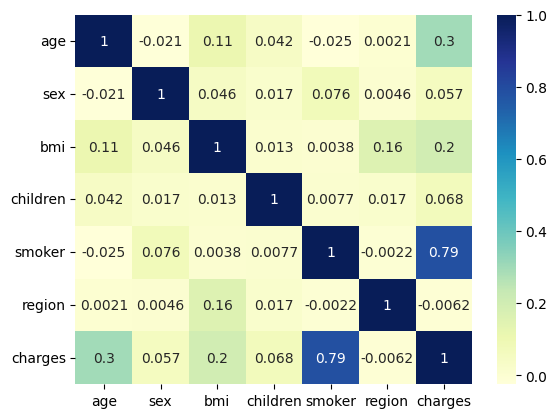

In [43]:
# visualisasi korelasi dengan heatmap
import seaborn as sns

sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()


1. import seaborn as sns:

  - Seaborn adalah library visualisasi data berbasis Matplotlib yang mempermudah pembuatan grafik yang lebih estetis dan informatif, termasuk heatmap.

2. sns.heatmap(data.corr(), cmap="YlGnBu", annot=True):
  - Kode tersebut digunakan untuk menghasilkan heatmap untuk menunjukkan korelasi antar variabel dalam dataset. Ini membantu dalam mengidentifikasi hubungan kuat atau lemah di antara fitur, yang penting untuk analisis dan pembuatan model.

In [44]:
X = data.drop(columns=['region','charges'])
y = data['charges']

X, y

(      age  sex     bmi  children  smoker
 0      19    0  27.900         0       1
 1      18    1  33.770         1       0
 2      28    1  33.000         3       0
 3      33    1  22.705         0       0
 4      32    1  28.880         0       0
 ...   ...  ...     ...       ...     ...
 1333   50    1  30.970         3       0
 1334   18    0  31.920         0       0
 1335   18    0  36.850         0       0
 1336   21    0  25.800         0       0
 1337   61    0  29.070         0       1
 
 [1338 rows x 5 columns],
 0       16884.92400
 1        1725.55230
 2        4449.46200
 3       21984.47061
 4        3866.85520
            ...     
 1333    10600.54830
 1334     2205.98080
 1335     1629.83350
 1336     2007.94500
 1337    29141.36030
 Name: charges, Length: 1338, dtype: float64)

- Menyimpan semua data pada Dataframe data dan menghapus data kolom 'charges'
- Ini mengakses kolom charges dari DataFrame data dan menyimpannya dalam variabel y.

kode ini mempersiapkan data untuk pelatihan model dengan membagi data menjadi fitur dan target.

### **3. Lakukan feature scaling jika diperlukan.**

In [45]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.values.reshape(-1,1))

1. from sklearn.preprocessing import StandardScaler:

    - Ini mengimpor kelas StandardScaler yang digunakan untuk mengubah data sehingga memiliki rata-rata 0 dan deviasi standar 1.
2. sc_X = StandardScaler() dan sc_y = StandardScaler():

  - Dua objek StandardScaler dibuat: satu untuk fitur (sc_X) dan satu untuk target (sc_y). Ini memastikan bahwa fitur dan target dinormalisasi secara terpisah.

3. X = sc_X.fit_transform(X):

  - melakukan standarisasi pada fitur yang terdapat pada variabel X

4. y = sc_y.fit_transform(y.values.reshape(-1, 1)):

  - melakukan standarisasi pada fitur yang terdapat pada variabel y serta merubah bentuk array pada variabel y menjadi 2 dimensi. hal tersebut disebabkan karena StandardScaler mengharapkan input 2 dimensi.

### **2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.**

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

Kode ini digunakan untuk membagi dataset menjadi set pelatihan dan pengujian.

1. from sklearn.model_selection import train_test_split:

  - Mengimpor fungsi train_test_split dari pustaka sklearn. Fungsi ini membantu membagi dataset secara acak menjadi set pelatihan dan pengujian.

2. train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100):

  - X_train dan y_train: 70% data untuk pelatihan.
  - X_test dan y_test: 30% data untuk pengujian.
  - random_state=100: Menjamin pembagian yang konsisten setiap kali kode dijalankan.

### **4. Buat model multiple linear regression menggunakan Scikit-Learn.**

In [47]:
from sklearn.linear_model import LinearRegression

# Inisialisasi model Linear Regression
model = LinearRegression()

1. from sklearn.linear_model import LinearRegression:
  - Mengimpor kelas LinearRegression yang merupakan implementasi dari algoritma regresi linier. Regresi linier digunakan untuk memodelkan hubungan antara variabel independen (fitur) dan variabel dependen (target).

2. model = LinearRegression():
  - Membuat objek dari kelas LinearRegression. Ini menginisialisasi model regresi linier yang siap digunakan untuk pelatihan dengan data yang telah disiapkan.

### **5. Latih model pada data latih dan lakukan prediksi pada data uji.**

In [48]:
# Melatih model dengan data training
model.fit(X_train, y_train)

# Melakukan prediksi dengan data testing
y_pred = model.predict(X_test)

1. model.fit(X_train, y_train):

  - Fungsi fit digunakan untuk melatih model regresi linier menggunakan data pelatihan. X_train berisi fitur dan y_train berisi target.

2. y_pred = model.predict(X_test):

  - fungsi predict digunakan untuk menghasilkan prediksi pada data pengujian (X_test). Hasil prediksi disimpan dalam variabel y_pred, yang berisi nilai yang diprediksi untuk setiap contoh dalam data pengujian berdasarkan model yang telah dilatih.

In [49]:
# # Mengembalikan prediksi dan data asli ke skala asli
y_pred_trans = sc_y.inverse_transform(y_pred).ravel()
y_test_trans = sc_y.inverse_transform(y_test.reshape(-1, 1)).ravel()

# # Menampilkan hasil prediksi dan target sebenarnya
df_results = pd.DataFrame({'Target (Actual)': y_test_trans, 'Prediction': y_pred_trans})

# # Tampilkan 10 data pertama untuk perbandingan
print("\nHasil Prediksi vs Target (Actual):")
print(df_results.head(10))


Hasil Prediksi vs Target (Actual):
   Target (Actual)    Prediction
0       1826.84300   4833.051831
1      20177.67113   5118.425633
2       7421.19455   8392.503217
3       1877.92940   3218.524711
4      15518.18025  24952.341505
5      29523.16560  37336.039101
6      13143.86485  14569.056414
7       3279.86855   2830.618169
8      18972.49500  30065.540478
9      12950.07120  15809.897320


### **6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.**

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Menghitung R-squared (R2) dari model terlatih
r2 = r2_score(y_test, y_pred)

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f"R-squared (R2): ", r2)
print(f"Mean Squared Error (MSE): ", mse)
print(f"Mean Absolute Error (MAE): ", mae)

R-squared (R2):  0.780095696440481
Mean Squared Error (MSE):  0.2178858611543138
Mean Absolute Error (MAE):  0.32184408252414876


Kode ini digunakan untuk mengevaluasi kinerja model regresi linier yang telah dilatih dengan menggunakan beberapa metrik evaluasi.

1. from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score:

  - Mengimpor tiga metrik evaluasi dari pustaka sklearn: mean_squared_error, mean_absolute_error, dan r2_score. Metrik ini digunakan untuk mengukur seberapa baik model dalam memprediksi nilai target.

2. r2 = r2_score(y_test, y_pred):

  - Menghitung nilai R-squared (R²), yang menunjukkan proporsi varians dalam data target yang dapat dijelaskan oleh model. Nilai R² berkisar antara 0 dan 1, di mana nilai yang lebih tinggi menunjukkan model yang lebih baik.

3. mse = mean_squared_error(y_test, y_pred):

  - Menghitung Mean Squared Error (MSE), yang mengukur rata-rata kuadrat perbedaan antara nilai yang diprediksi dan nilai aktual. MSE yang lebih rendah menunjukkan model yang lebih akurat.

4. mae = mean_absolute_error(y_test, y_pred):

  - Menghitung Mean Absolute Error (MAE), yang mengukur rata-rata absolut dari perbedaan antara nilai yang diprediksi dan nilai aktual. Seperti MSE, nilai MAE yang lebih rendah menunjukkan kinerja model yang lebih baik.

5. print(...):

  - Menampilkan hasil evaluasi untuk R², MSE, dan MAE ke layar. Ini memberikan informasi yang berguna tentang seberapa baik model melakukan prediksi pada data pengujian.

### **Visualisasi Hasil Prediksi.**

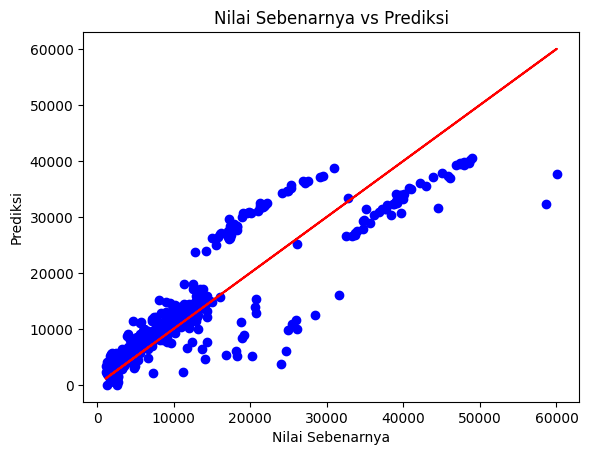

In [51]:
# Visualisasi hasil prediksi
plt.scatter(y_test_trans, y_pred_trans,color='blue')
plt.plot(y_test_trans, y_test_trans, color='red')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')
plt.title('Nilai Sebenarnya vs Prediksi')
plt.show()

Kode ini digunakan untuk memvisualisasikan hasil prediksi model regresi linier dengan membandingkan nilai aktual dan nilai yang diprediksi.

1. plt.scatter(y_test, y_pred, color='blue'):

  - Fungsi scatter digunakan untuk membuat plot sebar (scatter plot) yang menunjukkan titik-titik hasil prediksi (y_pred) terhadap nilai sebenarnya (y_test). Titik-titik ini berwarna biru.

2. plt.plot(y_test, y_test, color='red'):

  - Fungsi plot digunakan untuk menggambar garis lurus yang merepresentasikan hubungan ideal di mana nilai prediksi sama dengan nilai sebenarnya. Garis ini menggambarkan model yang sempurna, berwarna merah.

3. plt.xlabel('Nilai Sebenarnya') dan plt.ylabel('Prediksi'):

  - Menambahkan label pada sumbu x dan y. Sumbu x menunjukkan nilai sebenarnya, sedangkan sumbu y menunjukkan nilai yang diprediksi oleh model.

4. plt.title('Nilai Sebenarnya vs Prediksi'):

  - Menambahkan judul pada grafik untuk memberikan konteks tentang apa yang ditampilkan.

5. plt.show():

  - Menampilkan plot yang telah dibuat. Ini memungkinkan pengguna untuk melihat visualisasi dan menganalisis seberapa baik model dalam memprediksi nilai target.